In [30]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns

In [2]:
df = pd.read_csv('COVID19_state.csv')

In [3]:
df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,9655,314,9,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,42538,4723,151,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,24141,1739,38,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,51045,4719,177,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,266900,28963,1072,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


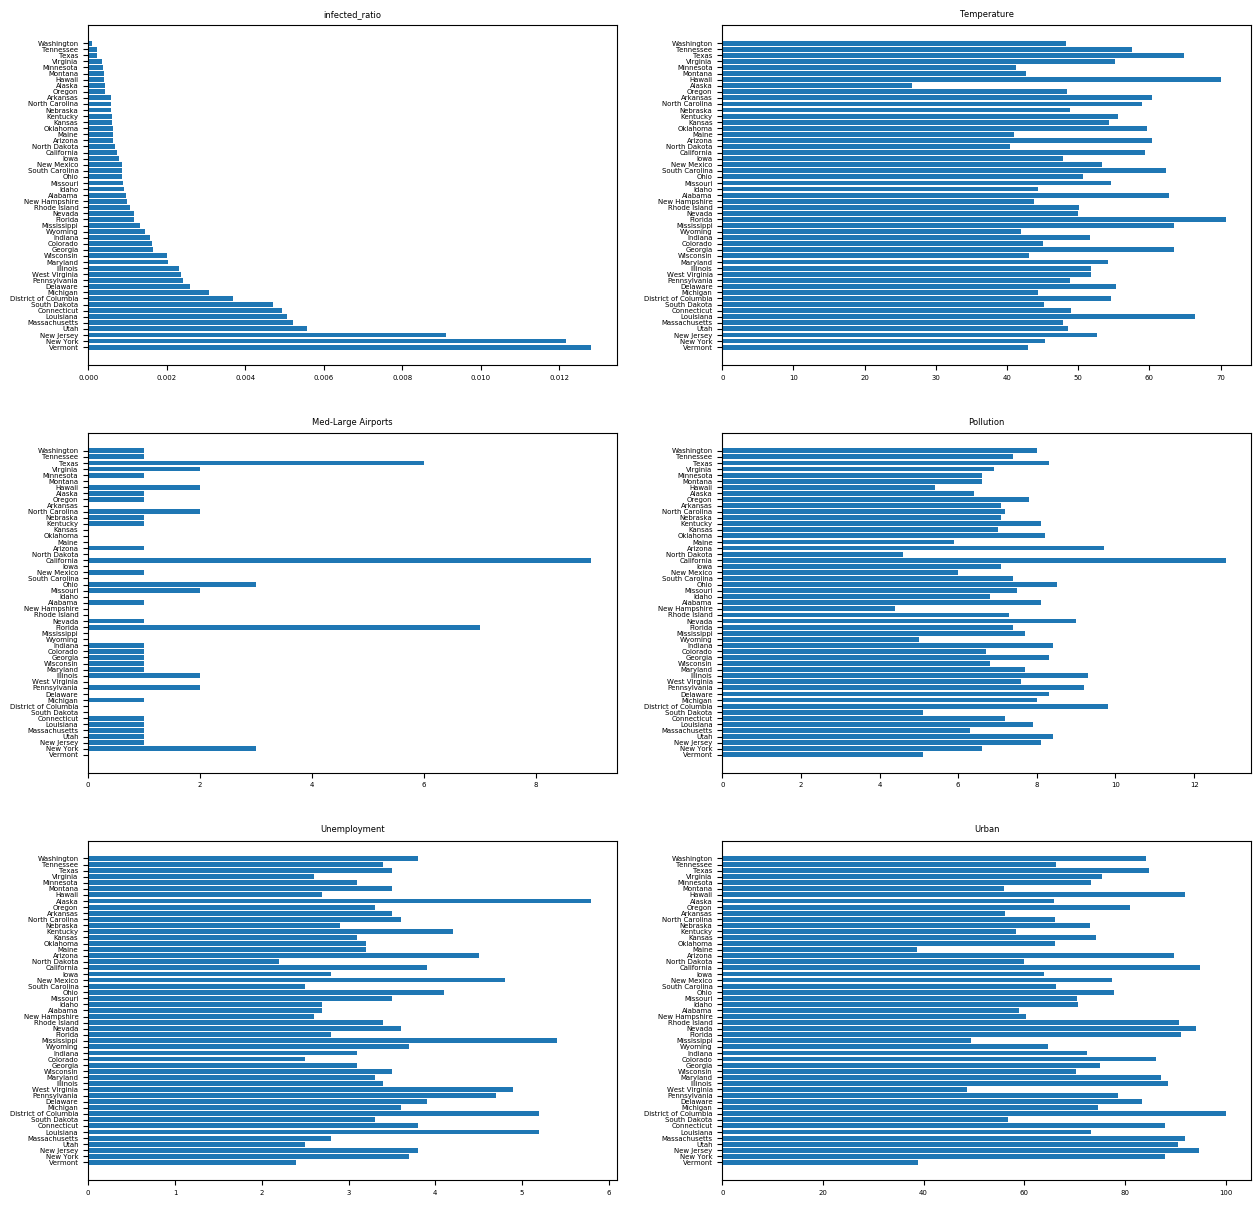

In [28]:
plt.rcdefaults()
plt.rcParams.update({'font.size': 5})
fig, ax = plt.subplots(3,2)
fig.set_size_inches(15, 15)
data = df[['State','infected_ratio','Temperature','Med-Large Airports','Pollution','Unemployment','Urban']]
data_bar = data.reset_index()
data_bar.sort_values(by=['infected_ratio'],inplace=True)
ax[0,0].barh(data_bar['State'],data_bar['infected_ratio'], align='center')
ax[0,0].invert_yaxis()  # labels read top-to-bottom
ax[0,0].set_title('infected_ratio')
ax[0,1].barh(data_bar['State'],data_bar['Temperature'], align='center')
ax[0,1].invert_yaxis()  # labels read top-to-bottom
ax[0,1].set_title('Temperature')
ax[1,0].barh(data_bar['State'],data_bar['Med-Large Airports'], align='center')
ax[1,0].invert_yaxis()  # labels read top-to-bottom
ax[1,0].set_title('Med-Large Airports')
ax[1,1].barh(data_bar['State'],data_bar['Pollution'], align='center')
ax[1,1].invert_yaxis()  # labels read top-to-bottom
ax[1,1].set_title('Pollution')
ax[2,0].barh(data_bar['State'],data_bar['Unemployment'], align='center')
ax[2,0].invert_yaxis()  # labels read top-to-bottom
ax[2,0].set_title('Unemployment')
ax[2,1].barh(data_bar['State'],data_bar['Urban'], align='center')
ax[2,1].invert_yaxis()  # labels read top-to-bottom
ax[2,1].set_title('Urban')
plt.show()

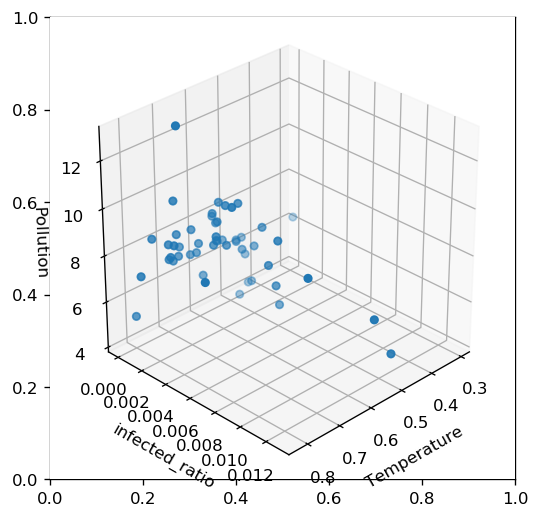

In [21]:
fig, ax = plt.subplots(figsize=(5,5),dpi=120)
plt.rcParams.update({'font.size': 10})
angle_z = 30
angle_x_y =45
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0.0116*df['Temperature'].values, \
                                 df['infected_ratio'].values, \
                                 df['Pollution'].values)
ax.set_xlabel('Temperature')
ax.set_ylabel('infected_ratio')
ax.set_zlabel('Pollution')
ax.view_init(angle_z,angle_x_y)
plt.show()

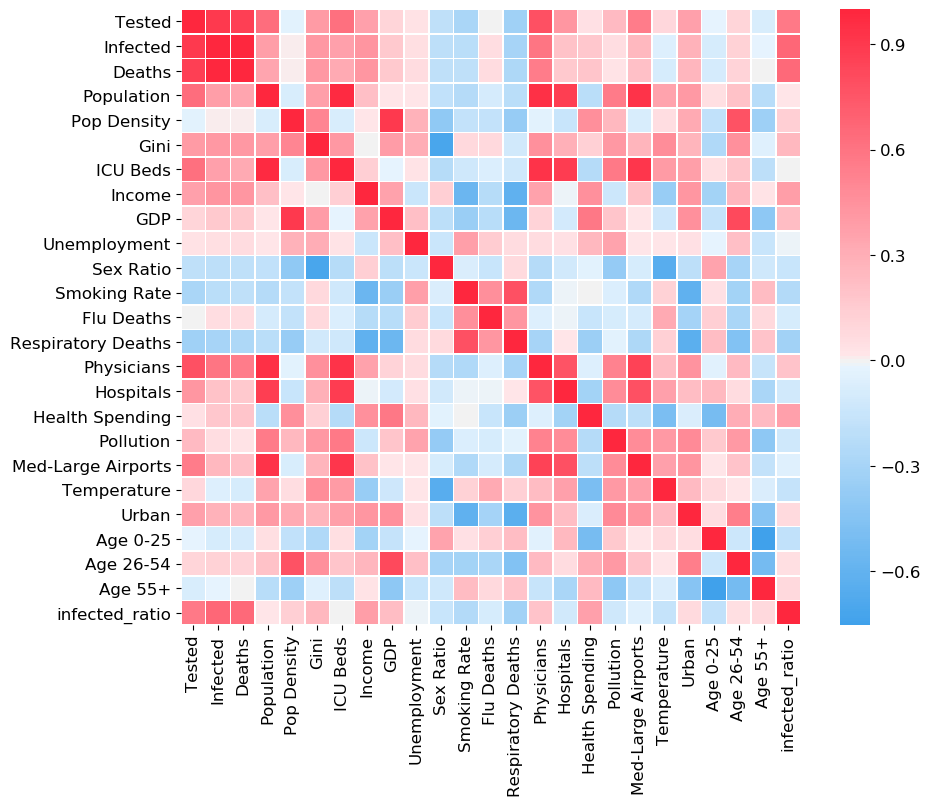

In [37]:
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(10,8)) 
rdgn = sns.diverging_palette(h_neg=250, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
g = sns.heatmap(df.drop(['State'],axis =1).corr(), annot=False, cmap=rdgn, center=0.00,linewidths=.5,ax=ax)